/Users/Zhijie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


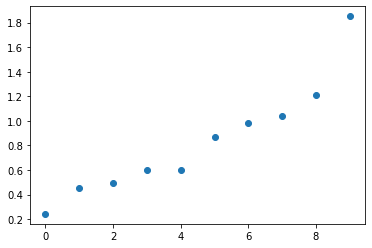

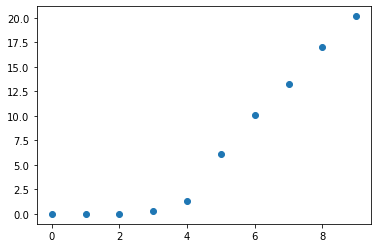

In [210]:

from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cvxpy as cvx



x_num=10
n_num=10
r_num=1000
meanD=0.01
meanC=0.01
sdD=0.1
sdC=0.1

np.random.seed(10)

statevec=np.ones((x_num+n_num+r_num))

D=meanD+sdD*np.random.normal(0, 1, (x_num,n_num))
C=meanC+sdC*np.random.normal(0, 1, (n_num,r_num))

mu=np.ones((x_num))
m=np.ones((n_num))
K=np.ones((r_num))

def d_statevec_dt(t,statevec):
    
    
        Xs=statevec[:x_num]
        Ns=statevec[x_num:x_num+n_num]
        Rs=statevec[x_num+n_num:]
        
        dXs=Xs*(np.dot(D,Ns)-mu)
        dNs=Ns*(np.dot(C,Rs)-m-np.dot(D.T,Xs))
        dRs=Rs*(K-Rs-np.dot(C.T,Ns))
        return np.concatenate((dXs,dNs,dRs),axis=None)

maxtime=20  
steps=1000
ts = np.linspace(0,maxtime,steps)    
sol = solve_ivp(d_statevec_dt, t_span=[0,maxtime],y0=statevec,t_eval=ts,method='LSODA')
ys=sol.y.T
plt.plot(np.sort(ys.T[x_num:x_num+n_num].T[-1]),'o')

#plt.plot(ts,ys.T.T)
#plt.xlabel('time')
#plt.ylabel('population')

Ns = cvx.Variable(n_num)
constraints=[D @ Ns >= mu, Ns>=0]
Q=np.dot(C,K)

prob = cvx.Problem(cvx.Minimize(-Q.T@Ns+(1/2)*cvx.quad_form(Ns, np.dot(C,C.T)) ),
                         constraints)
prob.solve()
plt.figure()
plt.plot(np.sort(Ns.value),'o')
#constraints[0].dual_value
#for value in Ns.value:
 #      plt.axhline(value)
#plt.ylim(0,2)

plt.show()
#print(ys.T[x_num:x_num+n_num].T)

In [155]:
Ns.value

/Users/Zhijie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 1.43720859e+01, -2.97960649e-21,  6.80524966e-22,  4.99780891e+00,
       -2.06041639e-21,  3.55322125e-01,  1.08651207e+00,  3.11386200e+00,
        4.70103089e+00,  3.80566774e+00,  4.70555138e-22,  7.77010631e-01,
        4.59513657e+00,  7.26194385e+00, -2.65804290e-21, -8.10749865e-22,
        1.23401958e-21, -6.73823154e-22, -1.99292646e-21, -1.53082997e-21])

In [63]:
np.dot(C,K)

array([ 3.44698741,  2.5253232 ,  4.83308529, -1.81455285, -0.19262428,
       -6.0142749 , -3.80474516, 11.43276319,  5.26768298,  0.75118155,
        1.73752065, -2.40415924, -3.75642319,  0.79078181,  1.52728926])

In [73]:
Q.T@Ns

Expression(AFFINE, UNKNOWN, ())

In [93]:
len(ys)

/Users/Zhijie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100

In [100]:
print(len(ys.T[x_num:x_num+n_num]))

15
